1. **Set Up**: We have a symmetric positive-definite matrix \(A\) and a vector \(b\). We want to find \(x\) such that \(Ax = b\).

2. **Cholesky Decomposition**: First, I decompose \(A\) into \(LL^T\), where \(L\) is a lower triangular matrix. This part is done manually through a series of steps that fill out the \(L\) matrix based on \(A\)'s values.

3. **Solving \(Ly = b\)**: With \(L\) ready, I solve \(Ly = b\) for \(y\) using `np.linalg.solve`, which takes advantage of \(L\) being lower triangular to solve efficiently.

4. **Solving \(L^T x = y\)**: Next, I solve \(L^T x = y\) for \(x\), again using `np.linalg.solve`. This time, it leverages \(L^T\) (the transpose of \(L\), which is upper triangular).

5. **Result**: The final `print(x)` shows the solution \(x\) to our original equation \(Ax = b\).


In [ ]:
import numpy as np

A = np.array([[1, 1, 1], [1, 2, 2], [1, 2, 3]])
b = np.array([1, 1.5, 3])

# Compute the Choleski factorization of A
L = np.zeros_like(A)
L[0, 0] = np.sqrt(A[0, 0])
L[1:, 0] = A[1:, 0] / L[0, 0]
for j in range(1, L.shape[1]):
    L[j, j] = np.sqrt(A[j, j] - sum(L[j, k]**2 for k in range(j)))
    for i in range(j+1, L.shape[0]):
        L[i, j] = (A[i, j] - sum(L[i, k] * L[j, k] for k in range(j))) / L[j, j]

# Solve Ly = b
y = np.linalg.solve(L, b)

# Solve L^T x = y
x = np.linalg.solve(L.T, y)

print(x)

The code defines a function `invert_matrix(A)` that inverts any square matrix \(A\). It operates in several steps:

1. **Augmentation**: The matrix \(A\) is augmented with the identity matrix of the same dimensions, creating an augmented matrix. This step sets the stage for applying Gauss-Jordan elimination.

2. **Forward Elimination**: The algorithm selects the maximum pivot in each column and swaps rows to position this pivot. Then, it performs row operations to transform the augmented matrix into an upper triangular form, ensuring that all elements below the diagonal are zero.

3. **Backward Elimination**: The function continues by normalizing each row so that the diagonal elements are 1. It then eliminates all above-diagonal elements to achieve an identity matrix on the left side of the augmented matrix.

4. **Extraction**: The inverse of \(A\) is extracted from the augmented matrix, which now contains the inverse on the right side.

To demonstrate the functionality, the code inverts a randomly generated 6x6 matrix \(A\), multiplies \(A\) by its inverse \(A_{\text{inv}}\), and prints both the matrix \(A\), its inverse \(A_{\text{inv}}\), and the product \(A_{\text{inv}}A\), which should closely resemble an identity matrix, confirming the accuracy of the inversion process.

In [ ]:
import numpy as np

def invert_matrix(A):
    rows, cols = A.shape
    aug = np.hstack((A, np.eye(rows)))

    for i in range(rows):
        max_row = i + np.argmax(np.abs(aug[i:, i]))
        aug[[i, max_row], :] = aug[[max_row, i], :]
        for j in range(i+1, rows):
            factor = aug[j, i] / aug[i, i]
            aug[j, i:] -= factor * aug[i, i:]
    for i in range(rows-1, -1, -1):
        aug[i, :] /= aug[i, i]
        for j in range(i-1, -1, -1):
            aug[j, :] -= aug[i, :] * aug[j, i]

    return aug[:, cols:]

# Test the function by inverting a 6x6 matrix
A = np.random.rand(6, 6)
A_inv = invert_matrix(A)

New=A_inv@A
print("A = \n",A)
print("Ainv = \n",A_inv)
print("Ainv @ A = \n",New)

The code demonstrates the implementation and execution of Gaussian elimination to solve a system of linear equations \(Ax = b\), where \(A\) is a square matrix and \(b\) is a vector. The process unfolds as follows:

1. **Setup**: It starts by generating a large square matrix \(a\) of size \(n \times n\) with \(n=500\), ensuring it's symmetric and positive definite by multiplying it with its transpose. A vector \(b\) of size \(n\) is also generated. Both \(a\) and \(b\) are populated with random values, rounded to three decimal places for precision.

2. **Gaussian Elimination Function (`gaussElimin_colon`)**:
   - **Elimination Phase**: The function iteratively adjusts the matrix \(a\) to an upper triangular form. For each row \(k\), it eliminates the coefficients below the diagonal by subtracting multiples of the row from all subsequent rows. This step modifies both \(a\) and \(b\) to ensure the system remains equivalent.
   - **Back Substitution**: Starting from the last row, the function calculates each unknown by solving the equation for the current row and using previously solved values for rows \(k+1\) to \(n\).

3. **Timing**: The code measures the time taken to perform the Gaussian elimination by capturing timestamps before and after the process, highlighting the efficiency of the algorithm for large systems.

4. **Output**: Finally, it prints the solution vector \(x\) obtained by solving the system \(Ax = b\) and the time taken to execute the Gaussian elimination, providing both the solution and performance metrics.

In [ ]:
import numpy as np
import time
start = time.time()
n = 500; np.random.seed( 36 )
a = np.random.random( (n,n)).round(3); a = a @ a.T
b = np.random.random( n).round(3)

In [ ]:
# C2 With colon notation
import numpy as np
import time
start = time.time()

def gaussElimin_colon(a,b):
  n = len(b)
  # Elimination Phase
  for k in range(0,n-1):
      for i in range(k+1,n):
         if a[i,k] != 0.0:
             lam = a [i,k]/a[k,k]
             a[i,k+1:n] = a[i,k+1:n] - lam*a[k,k+1:n]
             b[i] = b[i] - lam*b[k]

  # Back substitution
  for k in range(n-1,-1,-1):
      b[k] = (b[k] - np.dot(a[k,k+1:n],b[k+1:n]))/a[k,k]
  return b
print(gaussElimin_colon(a,b))
end = time.time()
print("Time taken = ",end - start)

**Without using colon notation**

This updated code performs Gaussian elimination to solve a system of linear equations \(Ax = b\) without using the colon notation (slicing) for array operations. Instead, it explicitly iterates through array elements. The procedure is as follows:

1. **Function Definition**: The `gaussElimin(a, b)` function is defined to perform Gaussian elimination. The input \(a\) is the coefficient matrix, and \(b\) is the right-hand side vector.

2. **Elimination Phase**: The code systematically transforms \(a\) into an upper triangular matrix. For each pivot element \(a[k][k]\), it eliminates the elements below the pivot by subtracting a scaled version of the pivot row from each subsequent row. This operation is also applied to \(b\), maintaining the system's equivalence.

3. **Back Substitution**: After achieving an upper triangular matrix, the function computes the solution vector from bottom to top. It calculates each variable by subtracting the known values and dividing by the diagonal coefficient in \(a\).

4. **Timing and Output**: The execution time is measured, and both the solution vector and the time taken are printed.

### Efficiency Comparison

The difference in efficiency between this version and the previous one using colon notation primarily stems from the way array operations are handled:

- **Colon Notation (Slicing)**: The first version uses NumPy's slicing (colon notation) to perform operations on whole rows or subarrays at once. This is inherently faster and more efficient because NumPy operations are vectorized. Vectorized operations are executed in compiled C code under the hood, which is significantly faster than Python loops.

- **Explicit Looping**: The updated code manually iterates through the matrix elements using for-loops. While this approach is more transparent and easier to understand from a programming standpoint, it's slower. Each operation in the loop is executed individually by the Python interpreter, which is less efficient than the compiled operations of NumPy.

The performance difference arises because the version with explicit looping does not leverage NumPy's optimized, low-level implementations for array operations. Instead, it relies on Python's inherent loop constructs, which are more computationally expensive for large datasets or complex calculations. Consequently, the first version using slicing is faster and more efficient for operations involving large matrices or arrays.

In [ ]:
#No colon notation
import numpy as np
import time
start = time.time()
def gaussElimin(a, b):
    n = len(b)

    # Elimination Phase
    for k in range(0, n - 1):
        for i in range(k + 1, n):
            if a[i][k] != 0.0:
                lam = a[i][k] / a[k][k]
                for j in range(k + 1, n):
                    a[i][j] = a[i][j] - lam * a[k][j]
                b[i] = b[i] - lam * b[k]

    # Back substitution
    for k in range(n - 1, -1, -1):
        sum_val = 0.0
        for j in range(k + 1, n):
            sum_val = sum_val + a[k][j] * b[j]
        b[k] = (b[k] - sum_val) / a[k][k]

    return b

result = gaussElimin(a, b)


print("Solution:")
print(result)
end = time.time()
print("Time taken:", end - start)


The code begins by solving a system of linear equations to find the coefficients \(a_0\), \(a_1\), \(a_2\), and \(a_3\) of a cubic polynomial that fits a given set of points. This is achieved through the following steps:

1. **Matrix Equation Setup**: It constructs a matrix \(A\) based on the powers of \(x\) (0 through 3) for each data point and a vector \(b\) representing the \(y\) values of these points. The system \(Ax = b\) encapsulates the problem of finding the polynomial coefficients that fit the data points.

2. **Solving for Coefficients**: Using `np.linalg.solve`, the code calculates the vector \(x\) that solves the matrix equation, yielding the coefficients \(a_0\), \(a_1\), \(a_2\), and \(a_3\). These coefficients define the cubic polynomial that best fits the data points according to the given equations.

Next, the code proceeds to plot the data points and the resulting polynomial fit:

1. **Data Points Definition**: It defines the original data points (\(x\) and \(y\) values) that the polynomial should fit.

2. **Polynomial Evaluation**: The coefficients \(a_0\), \(a_1\), \(a_2\), and \(a_3\) are used to evaluate the polynomial at a dense set of points (\(x_{\text{fit}}\)) to create a smooth curve. This curve represents the polynomial fit to the data.

3. **Plotting**: Finally, it plots both the original data points and the polynomial fit curve, showing how well the polynomial approximates the given data. The plot includes labels for the axes and a legend for clarity.

This two-part process demonstrates the mathematical technique of deriving a polynomial fit for a set of data points and visually assessing the fit's quality through plotting.

10.0 34.0 -9.0 0.0


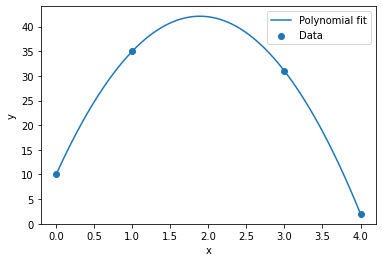

In [ ]:
#a0 + a1*0 + a2*0^2 + a3*0^3 = 10
#a0 + a1*1 + a2*1^2 + a3*1^3 = 35
#a0 + a1*3 + a2*3^2 + a3*3^3 = 31
#a0 + a1*4 + a2*4^2 + a3*4^3 = 2
#| 1   0   0    0  |   | a0 |   | 10 |
#| 1   1   1    1  |   | a1 |   | 35 |
#| 1   3   9   27  | * | a2 | = | 31 |
#| 1   4  16   64  |   | a3 |   |  2 |
import numpy as np

# Define the matrix A and the vector b
A = np.array([[1, 0, 0, 0], [1, 1, 1, 1], [1, 3, 9, 27], [1, 4, 16, 64]])
b = np.array([10, 35, 31, 2]).reshape(-1, 1)

# Solve the matrix equation Ax = b for x
x = np.linalg.solve(A, b)

# The coefficients are the elements of x
a0, a1, a2, a3 = x.flatten()
print(a0,a1,a2,a3)
import numpy as np
import matplotlib.pyplot as plt

# Define the data points
x_data = [0, 1, 3, 4]
y_data = [10, 35, 31, 2]

# Define the coefficients of the polynomial fit
a0 = 10.0
a1 = 34
a2 = -9
a3 = 0

# Define a range of x values to plot the polynomial fit
x_fit = np.linspace(0, 4, 100)

# Evaluate the polynomial at the x values
y_fit = a0 + a1*x_fit + a2*x_fit**2 + a3*x_fit**3

# Plot the data points and the polynomial fit
plt.scatter(x_data, y_data, label='Data')
plt.plot(x_fit, y_fit, label='Polynomial fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

This code calculates forces in a truss structure by:

1. **Converting an angle** from degrees to radians to use in trigonometric functions.
2. **Calculating sine and cosine** of the angle, necessary for defining the truss's orientation.
3. **Setting up and solving a matrix equation** \(A\vec{P} = \vec{b}\), where \(A\) represents the truss constraints, \(\vec{P}\) the unknown forces, and \(\vec{b}\) the external loads.
4. **Using `np.linalg.solve`**, it finds the forces in the truss members.
5. **Printing the results**, showing the magnitudes of these forces.

The process employs static equilibrium principles to determine the internal forces critical for the truss's structural analysis.

In [ ]:
import numpy as np

# Define the angle in radians
theta = np.deg2rad(53)

# Compute sin(theta) and cos(theta)
s = np.sin(theta)
c = np.cos(theta)

# Define the coefficient matrix and right-hand side vector
A = np.array([[c, 1, 0, 0, 0],
              [0, s, 0, 0, 0],
              [0, 2*s, 0, 0, 1],
              [0, -c, c, 1, 0],
              [0, s, s, 0, 0]])

b = np.array([0, 0, 1, 0, 0])

# Solve the system of equations for the unknown forces
P = np.linalg.solve(A, b)

# Print the results
print("The forces in the truss are:")
print("P1 = {:.2f}".format(P[0]))
print("P2 = {:.2f}".format(P[1]))
print("P3 = {:.2f}".format(P[2]))
print("P4 = {:.2f}".format(P[3]))
print("P5 = {:.2f}".format(P[4]))

The forces in the truss are:
P1 = 0.00
P2 = 0.00
P3 = 0.00
P4 = 0.00
P5 = 1.00
